### Install Required Packages

In [ ]:
! pip install -q --upgrade google-generativeai langchain-google-genai python-dotenv


In [ ]:
!pip install chromadb

In [ ]:
 !pip install pypdf

In [ ]:
# prompt: create a .env file in the workspace
# https://makersuite.google.com/

!echo -e 'GOOGLE_API_KEY=Your api key' > .env


In [ ]:
!ls -a

.  ..  .config	data  .env  sample_data


In [ ]:
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
from IPython.display import display
from IPython.display import Markdown
import textwrap


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
import google.generativeai as genai

In [ ]:
import os
genai.configure(api_key=os.environ.get("GOOGLE_API_KEY"))

### Text Generation

In [ ]:
model = genai.GenerativeModel(model_name = "gemini-pro")
model

 genai.GenerativeModel(
   model_name='models/gemini-pro',
   generation_config={}.
   safety_settings={}
)

In [ ]:
prompt = [
    "What is KMUTT?",
]

response = model.generate_content(prompt)

In [ ]:
to_markdown(response.text)

> King Mongkut's University of Technology Thonburi (KMUTT) is a public research university located in Bangkok, Thailand. It was founded in 1960 as a branch of King Mongkut's Institute of Technology Ladkrabang (KMITL) and became an independent university in 1986. KMUTT is known for its engineering, science, and technology programs, and is ranked among the top universities in Thailand.
> 
> KMUTT offers a wide range of undergraduate and graduate programs in various fields, including engineering, science, architecture, management, and social sciences. The university has a strong focus on research and innovation, and has established several research centers and institutes to promote interdisciplinary research and collaboration.
> 
> KMUTT has a diverse student body, with over 20,000 undergraduate and graduate students enrolled. The university also has a strong international presence, with students from over 50 countries studying at KMUTT. The university offers a variety of student services, including housing, dining, and financial aid.
> 
> KMUTT is committed to providing its students with a high-quality education and a supportive learning environment. The university has a strong emphasis on practical experience and hands-on learning, and provides its students with opportunities to gain real-world experience through internships and co-op programs. KMUTT also has a strong commitment to sustainability and environmental responsibility, and has implemented several initiatives to reduce its environmental impact.
> 
> KMUTT is a leading university in Thailand and is ranked among the top universities in the country. The university is known for its strong engineering, science, and technology programs, and has a strong focus on research and innovation. KMUTT is committed to providing its students with a high-quality education and a supportive learning environment, and is a popular choice for students from Thailand and around the world.

### Use LangChain to Access Gemini API

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI


In [ ]:
llm = ChatGoogleGenerativeAI(model="gemini-pro")

In [ ]:
result = llm.invoke("What is KMUTT?")


In [ ]:
to_markdown(result.content)

> King Mongkut's University of Technology Thonburi (KMUTT) is a public research university located in Bang Khun Thian, Bangkok, Thailand. It was established in 1960 as Thonburi Technical College by King Bhumibol Adulyadej, and later became a university in 1991. KMUTT is widely recognized as one of the leading universities in Thailand and Southeast Asia, particularly in the fields of engineering, technology, and science.
> 
> KMUTT offers a wide range of undergraduate and graduate programs in various disciplines, including engineering, technology, science, management, architecture, and industrial education. The university has a strong emphasis on research and development, with several research centers and institutes focusing on various areas such as renewable energy, materials science, biotechnology, and advanced manufacturing.
> 
> KMUTT is also known for its international collaboration and partnerships with universities and research institutions around the world. The university actively promotes student and faculty exchange programs, joint research projects, and international conferences.
> 
> Here are some key facts and achievements of KMUTT:
> 
> - Ranked among the top universities in Thailand and Southeast Asia by various international rankings.
> - Strong focus on engineering, technology, and science.
> - Extensive research and development activities with several research centers and institutes.
> - International collaborations and partnerships with universities and research institutions worldwide.
> - Modern and well-equipped campus facilities, including laboratories, libraries, and research centers.
> - Committed to providing high-quality education and producing graduates with strong technical and professional skills.
> 
> KMUTT continues to play a significant role in Thailand's higher education and research landscape, contributing to the country's technological and economic development.

### Gemini Pro Vision

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
        },
        {"type": "image_url", "image_url": "https://blog.japanwondertravel.com/wp-content/uploads/2022/03/manuel-velasquez-ssfp9okORYs-unsplash.jpg"},
    ]
)
llm.invoke([message])

AIMessage(content=' A busy street in Shinjuku, Tokyo, Japan at night.')

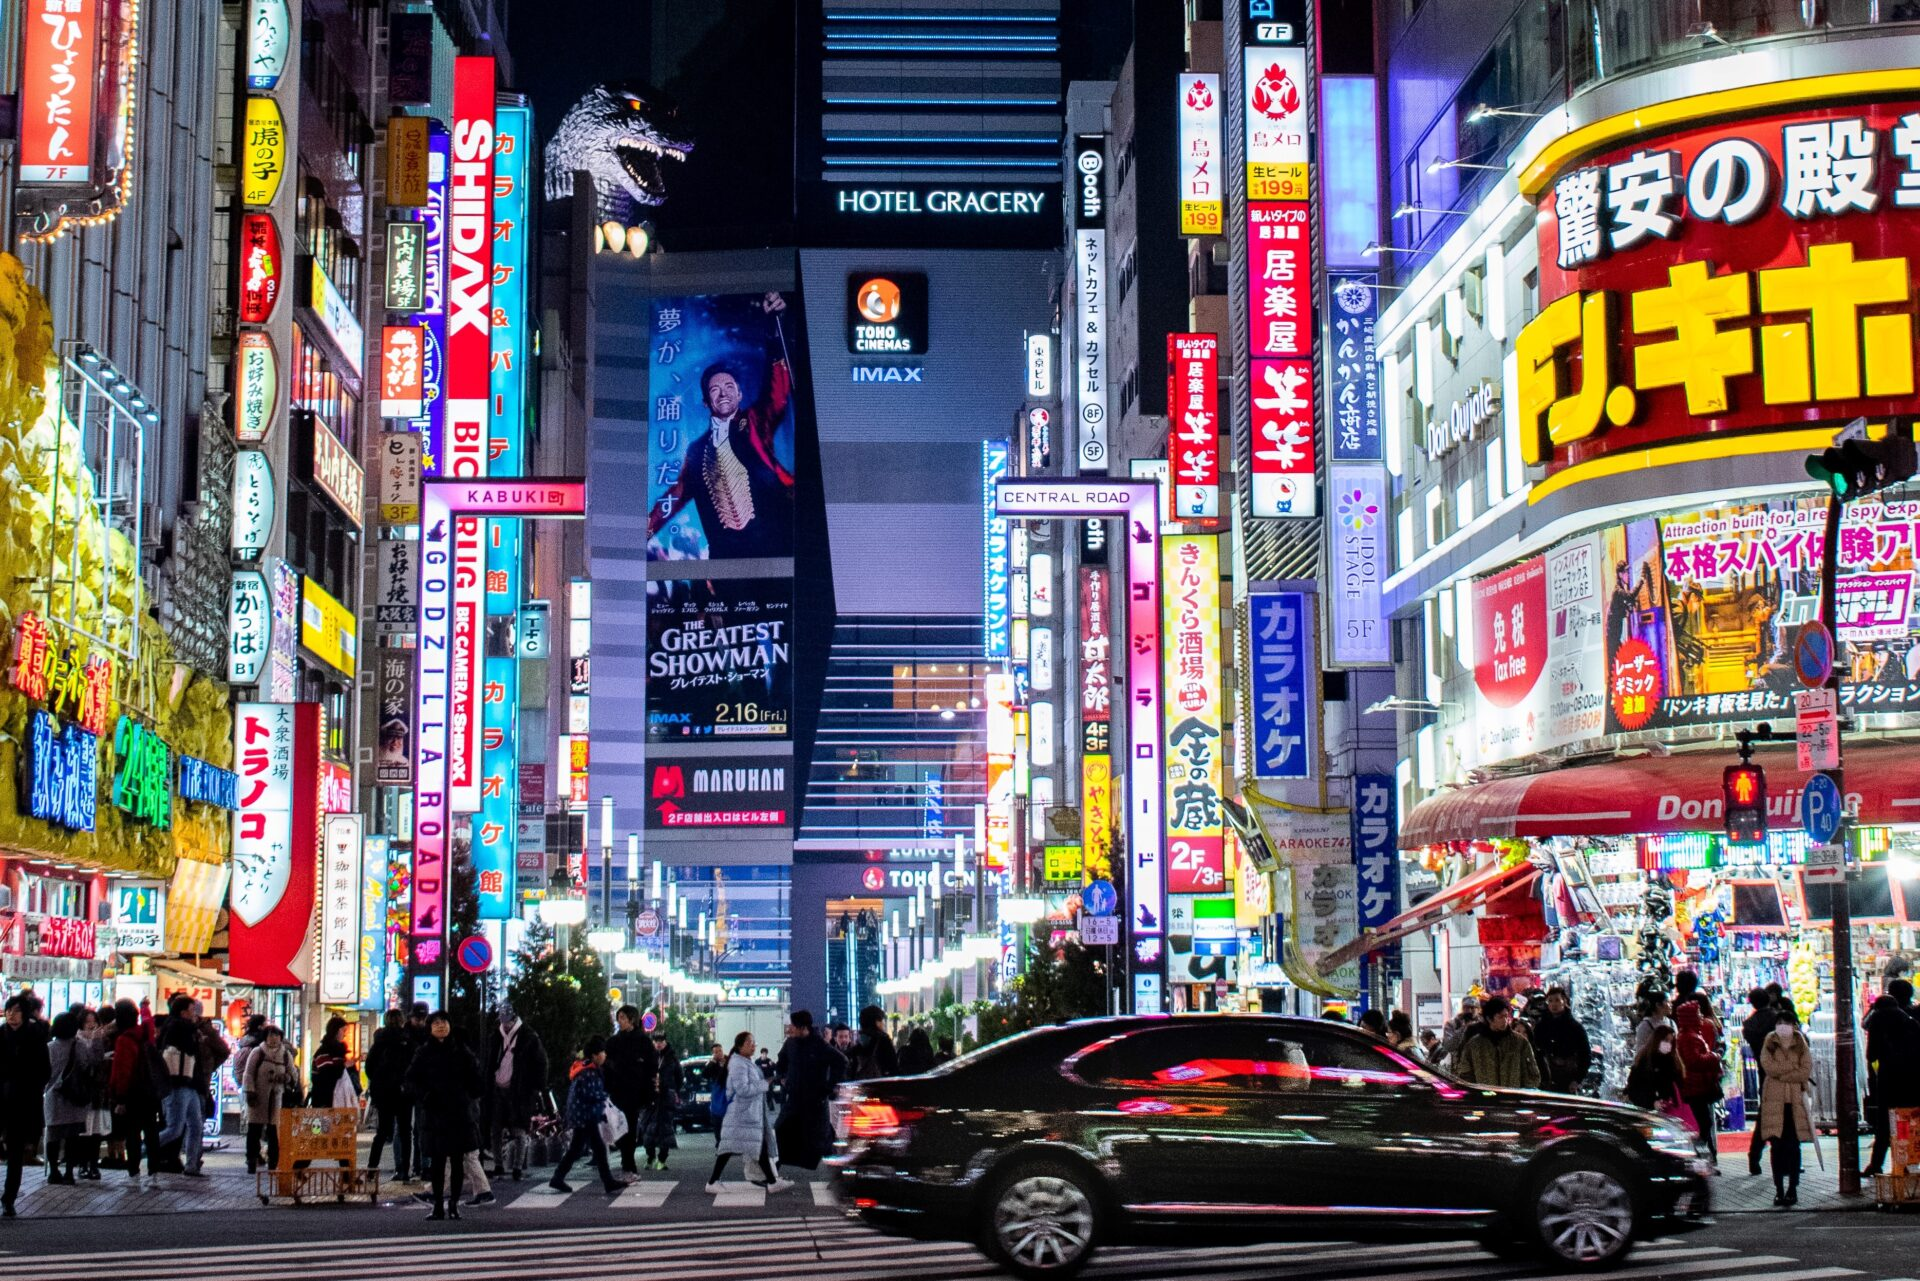

In [ ]:
# prompt: How to show an image from a given url within markdown
import requests
import io
from PIL import Image

def show_image(url):
  response = requests.get(url)
  image = Image.open(io.BytesIO(response.content))
  display(image)

show_image("https://blog.japanwondertravel.com/wp-content/uploads/2022/03/manuel-velasquez-ssfp9okORYs-unsplash.jpg")


In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What do you see in this image?",
        },
        {"type": "image_url", "image_url": "https://blog.japanwondertravel.com/wp-content/uploads/2022/03/manuel-velasquez-ssfp9okORYs-unsplash.jpg"},
    ]
)
llm.invoke([message])

AIMessage(content=' A busy street in Shinjuku, Tokyo, Japan at night. There are many people crossing the street, and there are many bright lights and signs on the buildings. There is a car in the foreground, and a Godzilla statue in the background.')

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What do you see in this image? Create a short story based on the content",
        },
        {"type": "image_url", "image_url": "https://blog.japanwondertravel.com/wp-content/uploads/2022/03/manuel-velasquez-ssfp9okORYs-unsplash.jpg"},
    ]
)

In [ ]:
result = llm.invoke([message])

In [ ]:
to_markdown(result.content)

>  In the heart of the bustling city, a lone black car navigates through the sea of people crossing the road. The streets are adorned with vibrant neon lights, illuminating the night sky with a kaleidoscope of colors. The towering buildings are covered in advertisements, each vying for attention with their flashy displays. Amidst the urban cacophony, a young woman stands on the sidewalk, her eyes fixed on the mesmerizing sight before her.
> 
> Her name is Ayumi, a 25-year-old aspiring artist who has come to Tokyo to pursue her dreams. She has always been fascinated by the city's energy and diversity, and now she finds herself immersed in its vibrant culture. As she gazes at the people passing by, each with their unique stories and aspirations, she feels a sense of belonging and excitement.
> 
> Ayumi takes a deep breath, feeling the pulse of the city in her veins. She knows that this is where she wants to be, where her dreams can take flight. With determination in her eyes, she steps forward, ready to embrace the challenges and opportunities that lie ahead.
> 
> As Ayumi walks down the street, she passes by a group of street musicians playing lively tunes. The music fills the air, adding to the already vibrant atmosphere. She stops for a moment to listen, her heart swelling with joy. She realizes that this city is not just about the bright lights and towering buildings, but also about the people who bring it to life.
> 
> Ayumi continues on her way, feeling inspired and energized. She knows that Tokyo is a city of dreams, where anything is possible. With a renewed sense of purpose, she embraces the unknown, ready to create her own story in this captivating metropolis.

## Chat with Documents

to_markdown(f"""
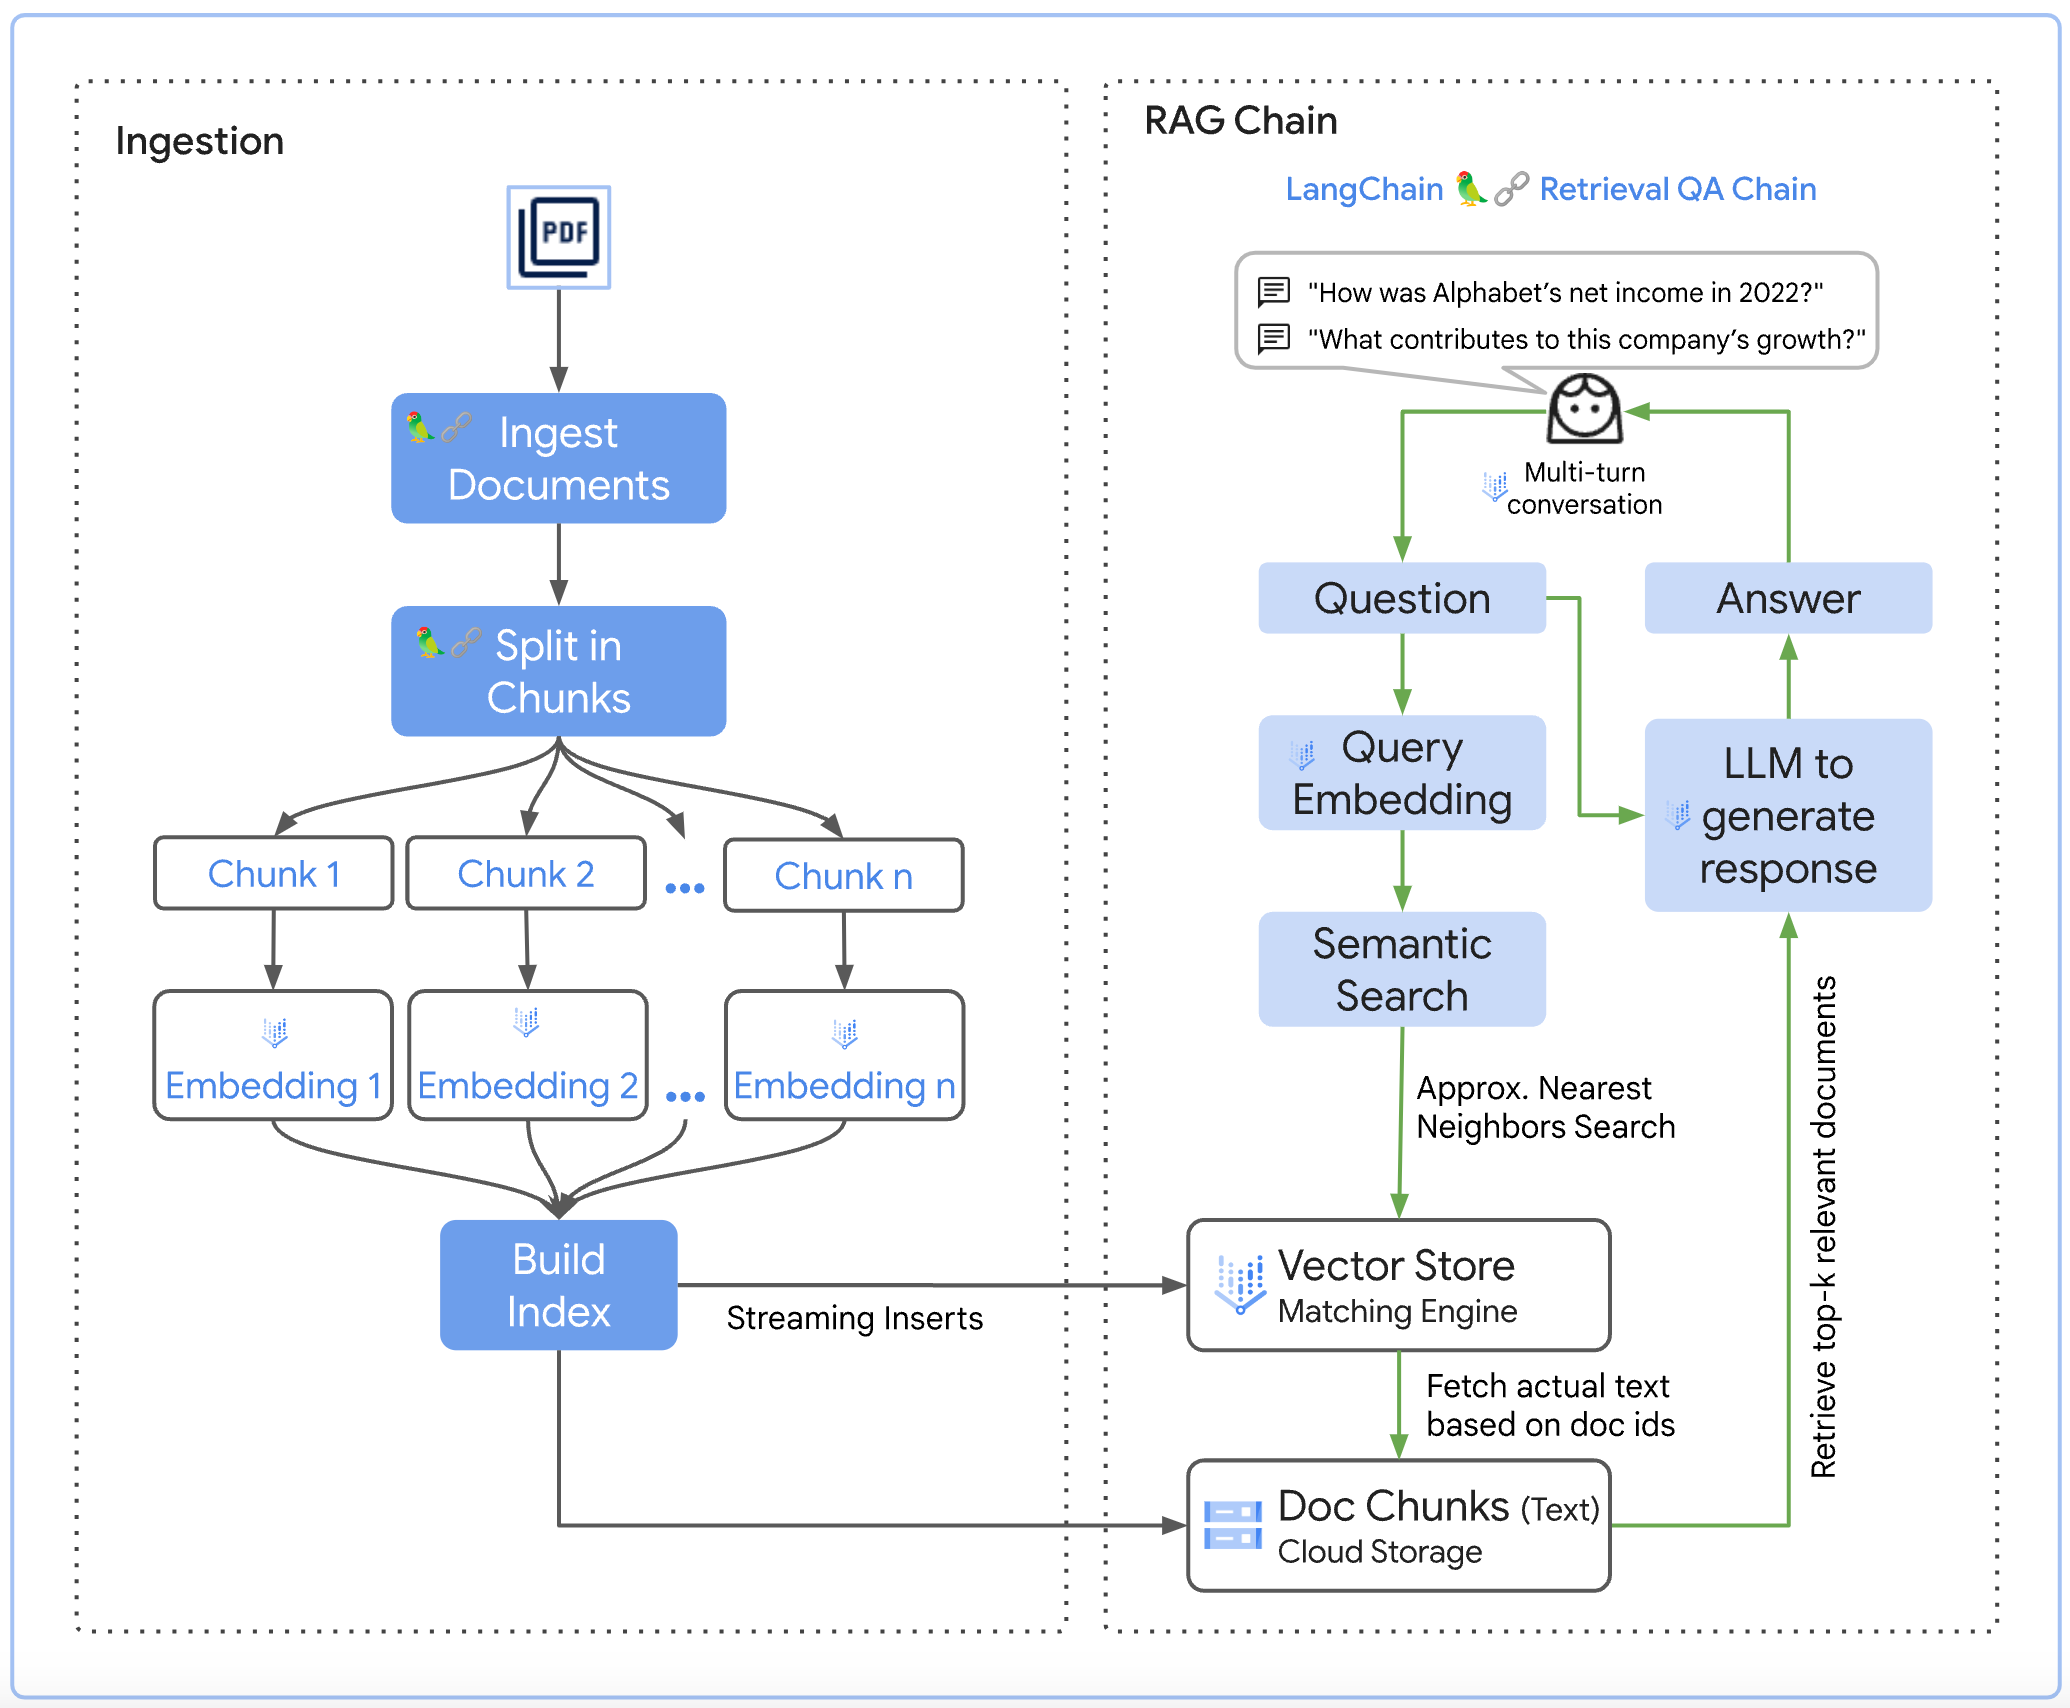
""")


In [ ]:
 !sudo apt -y -qq install tesseract-ocr libtesseract-dev

!sudo apt-get -y -qq install poppler-utils libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig

!pip install langchain

libtesseract-dev is already the newest version (4.1.1-2.1build1).
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
import urllib
import warnings
from pathlib import Path as p
from pprint import pprint

import pandas as pd
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma

warnings.filterwarnings("ignore")
# restart python kernal if issues with langchain import.

### In Context Information Retreival




In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI


In [ ]:
model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.3)


### Download the document

In [ ]:
data_folder = p.cwd() / "data"
p(data_folder).mkdir(parents=True, exist_ok=True)

pdf_url = "https://services.google.com/fh/files/misc/practitioners_guide_to_mlops_whitepaper.pdf"
pdf_file = str(p(data_folder, pdf_url.split("/")[-1]))

urllib.request.urlretrieve(pdf_url, pdf_file)

('/content/data/practitioners_guide_to_mlops_whitepaper.pdf',
 <http.client.HTTPMessage at 0x798ddb6323b0>)

### Extract text from the PDF

In [ ]:
pdf_loader = PyPDFLoader(pdf_file)
pages = pdf_loader.load_and_split()
print(pages[3].page_content)


4
Organizations can use the framework to identify gaps in building an integrated ML platform and to focus on the scale 
and automate themes from Google’s AI Adoption Framework. The decision about whether (or to which degree) to 
adopt each of these processes and capabilities in your organization depends on your business context. For exam -
ple, you must determine the business value that the framework creates when compared to the cost of purchasing or 
building capabilities (for example, the cost in engineering hours).
Overview of MLOps lifecycle  
and core capabilities
Despite the growing recognition of AI/ML as a crucial pillar of digital transformation, successful deployments and 
effective operations are a bottleneck for getting value from AI. Only one in two organizations has moved beyond 
pilots and proofs of concept. Moreover, 72% of a cohort of organizations that began AI pilots before 2019 have not 
been able to deploy even a single application in production.1 Algorithmia’s sur

In [ ]:
context = "\n".join(str(p.page_content) for p in pages[:30])
print("The total words in the context: ", len(context))

The total words in the context:  55545


### Prompt Design - In Context

In [ ]:
prompt_template = """Answer the question as precise as possible using the provided context. If the answer is
                    not contained in the context, say "answer not available in context" \n\n
                    Context: \n {context}?\n
                    Question: \n {question} \n
                    Answer:
                  """

prompt = PromptTemplate(
    template=prompt_template, input_variables=["context", "question"]
)

In [ ]:
stuff_chain = load_qa_chain(model, chain_type="stuff", prompt=prompt)


In [ ]:
question = "What is Experimentation? Provide a detailed answer."


stuff_answer = stuff_chain(
    {"input_documents": pages[7:10], "question": question}, return_only_outputs=True
)

In [ ]:
pprint(stuff_answer)


{'output_text': 'answer not available in context'}


In [ ]:
question = "Describe data management and feature management systems."


stuff_answer = stuff_chain(
    {"input_documents": pages[7:10], "question": question}, return_only_outputs=True
)

pprint(stuff_answer)


{'output_text': 'Answer not available in context'}


### RAG Pipeline: Embedding + LLM

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=0)
context = "\n\n".join(str(p.page_content) for p in pages)
texts = text_splitter.split_text(context)

In [ ]:
# texts

In [ ]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [ ]:
vector_index = Chroma.from_texts(texts, embeddings).as_retriever()


In [ ]:
question = "Describe data management and feature management systems."
docs = vector_index.get_relevant_documents(question)


In [ ]:
docs

[Document(page_content='26\nThe serving engine can serve predictions to consumers in the following \nforms:\n• Online inference in near real time for high-frequency singleton \nrequests (or mini batches of requests), using interfaces like REST \nor gRPC.\n• Streaming inference in near real time, such as through an \nevent-processing pipeline.\n• Offline batch inference for bulk data scoring, usually integrated \nwith extract, transform, load (ETL) processes.\n• Embedded inference as part of embedded systems or edge devic -\nes.\nIn some scenarios of prediction serving, the serving engine might need \nto look up feature values that are related to the request. For example, you \nmight have a model that predicts the propensity of a customer to buy a \nparticular product, given a set of customer and product features. However, \nthe request includes only the customer and the product identifier. There -\nfore, the serving engine uses these identifiers to fetch the customer and \nthe product 

In [ ]:
stuff_answer = stuff_chain(
    {"input_documents": docs, "question": question}, return_only_outputs=True
)

In [ ]:
pprint(stuff_answer)


{'output_text': 'Data management and feature management systems provide a '
                'unified repository for ML features and datasets. This helps '
                'mitigate issues such as training-serving skew, which can '
                'occur when data is extracted from different sources in '
                'different forms during training and serving. Feature '
                'management systems allow data scientists and researchers to '
                'discover and reuse available feature sets for their entities '
                'instead of re-creating the entities in order to create their '
                'own datasets.'}
